## 1. XOR 데이터 생성 (NumPy 사용)

In [1]:
# [1] 라이브러리 import
import numpy as np
import torch
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch'

In [ ]:
# [2] XOR 데이터 정의
x_seeds = np.array([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=np.float32)
y_seeds = np.array([0, 1, 1, 0])  # XOR 정답

In [ ]:
# [3] 1000개의 샘플 랜덤 생성 (복원 추출)
N = 1000
idxs = np.random.randint(0, 4, N)  # 0~3 인덱스 중 하나 랜덤 선택

In [ ]:
# [4] 샘플 복제
X = x_seeds[idxs]  # shape: (1000, 2)
Y = y_seeds[idxs]  # shape: (1000,)

In [ ]:
# [5] 입력 데이터에 노이즈 추가
X += np.random.normal(scale=0.25, size=X.shape)

# 노이즈 사용 이유 : 모델이 더 일반화된 학습을 하게 되고, 단순히 "외우는 것"이 아니라 패턴을 이해하는 것에 더 가까워진다.

## 2. Shallow Neural Network (PyTorch 사용)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class shallow_neural_network(nn.Module):
    def __init__(self, num_input_features, num_hiddens):
        super().__init__()
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens

        # [PyTorch] 레이어 정의
        self.linear1 = nn.Linear(num_input_features, num_hiddens)  # 입력 → 은닉층
        self.linear2 = nn.Linear(num_hiddens, 1)                   # 은닉층 → 출력

        # [PyTorch] 비선형 활성 함수 정의
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        z1 = self.linear1(x)        # 선형 변환
        a1 = self.tanh(z1)          # 비선형 활성화
        z2 = self.linear2(a1)
        a2 = self.sigmoid(z2)       # 출력 확률화
        return a2

## 3. SGD

In [ ]:
# 하이퍼파라미터 설정
num_epochs = 100
lr = 1.0
num_hiddens = 3

# 모델, 옵티마이저, 손실 함수 정의
model = shallow_neural_network(2, num_hiddens)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.BCELoss()  # Binary Cross Entropy Loss

In [ ]:
# 손실 기록용 리스트
sgd_losses = []

In [ ]:
# 학습 루프
for epoch in range(num_epochs):
    cost = 0.0

    for x, y in zip(X, Y):
        x_torch = torch.from_numpy(x)               # 입력을 텐서로 변환
        y_torch = torch.FloatTensor([y])            # 정답도 텐서로 변환

        y_hat = model(x_torch)                      # 예측 수행

        loss = loss_fn(y_hat, y_torch)              # 손실 계산
        optimizer.zero_grad()
        loss.backward()                             # 전체 배치에 대해 역전파
        optimizer.step()                            # 파라미터 업데이트

        cost += loss.item()                          # 비용 누적

    cost = cost / len(X)                             # 평균 손실

    # 손실 기록용에 추가!
    sgd_losses.append(cost)

    if epoch % 10 == 0:
        print(epoch, cost)                           # 출력

0 0.673030415964502
10 0.37162201567788816
20 0.34045263969055123
30 0.32472417362722333
40 0.32990022767977417
50 0.36456977501061555
60 0.3527260500074067
70 0.34062406417788177
80 0.3221593842672337
90 0.33882026748118643


In [ ]:
for x, y in zip(x_seeds, y_seeds):
    print(x)  # 입력 벡터 출력

    x_torch = torch.FloatTensor(x)       # 입력 벡터를 텐서로 변환
    y_hat = model(x_torch)               # 모델 예측 수행

    print(y, y_hat.item())               # 정답 y와 예측값 ŷ 출력


[0. 0.]
0 1.9216004147892818e-05
[1. 0.]
1 0.9571176767349243
[0. 1.]
1 0.942145586013794
[1. 1.]
0 0.006013449747115374


## 4. GD

In [ ]:
# 하이퍼파라미터 설정
num_epochs = 100
lr = 1.0
num_hiddens = 3

# 모델, 옵티마이저, 손실 함수 정의
model = shallow_neural_network(2, num_hiddens)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.BCELoss()  # Binary Cross Entropy Loss

In [ ]:
# 손실 기록용 리스트
gd_losses = []

In [ ]:
# 학습 루프
for epoch in range(num_epochs):
    optimizer.zero_grad()

    cost = 0.0

    for x, y in zip(X, Y):
        x_torch = torch.from_numpy(x)               # 입력을 텐서로 변환
        y_torch = torch.FloatTensor([y])            # 정답도 텐서로 변환

        y_hat = model(x_torch)                      # 예측 수행

        loss_val = loss_fn(y_hat, y_torch)          # 손실 계산
        cost += loss_val                            # 비용 누적

    cost = cost / len(X)                             # 평균 손실
    cost.backward()                                  # 전체 배치에 대해 역전파
    optimizer.step()                                 # 파라미터 업데이트

    # 손실기록용에 추가!
    gd_losses.append(cost.item())

    if epoch % 10 == 0:
        print(epoch, cost)                    # 출력 시 .item()으로 숫자화

0 tensor(0.7099, grad_fn=<DivBackward0>)
10 tensor(0.6943, grad_fn=<DivBackward0>)
20 tensor(0.6883, grad_fn=<DivBackward0>)
30 tensor(0.6787, grad_fn=<DivBackward0>)
40 tensor(0.6604, grad_fn=<DivBackward0>)
50 tensor(0.6248, grad_fn=<DivBackward0>)
60 tensor(0.5618, grad_fn=<DivBackward0>)
70 tensor(0.4805, grad_fn=<DivBackward0>)
80 tensor(0.4093, grad_fn=<DivBackward0>)
90 tensor(0.3590, grad_fn=<DivBackward0>)


In [ ]:
for x, y in zip(x_seeds, y_seeds):
    print(x)  # 입력 벡터 출력

    x_torch = torch.FloatTensor(x)       # 입력 벡터를 텐서로 변환
    y_hat = model(x_torch)               # 모델 예측 수행

    print(y, y_hat.item())               # 정답 y와 예측값 ŷ 출력


[0. 0.]
0 0.11909998208284378
[1. 0.]
1 0.8359994292259216
[0. 1.]
1 0.8389939665794373
[1. 1.]
0 0.14729855954647064


## 5. SGD vs GD 비교 + 표 생성

In [ ]:
# 결과를 표로 만들기
df = pd.DataFrame({
    'Epoch': list(range(1, num_epochs + 1)),
    'SGD Loss': sgd_losses,
    'GD Loss': gd_losses
})

print(df.head(10))  # 앞부분만 미리 보기

   Epoch  SGD Loss   GD Loss
0      1  0.673030  0.709850
1      2  0.484008  0.703136
2      3  0.399226  0.700450
3      4  0.393402  0.699062
4      5  0.406449  0.698121
5      6  0.375619  0.697358
6      7  0.421433  0.696682
7      8  0.347469  0.696056
8      9  0.354453  0.695461
9     10  0.376910  0.694890


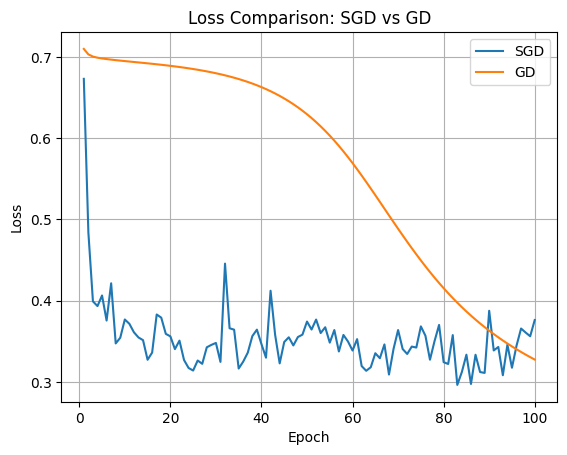

In [ ]:
# 시각화
plt.plot(df['Epoch'], df['SGD Loss'], label='SGD')
plt.plot(df['Epoch'], df['GD Loss'], label='GD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison: SGD vs GD')
plt.legend()
plt.grid(True)
plt.show()
